In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Example usage:
# Create and train the KNN classifier
knn = KNN(k=3)
X_train = np.array([[1, 2], [2, 3], [3, 4]])
y_train = np.array([0, 1, 0])
knn.fit(X_train, y_train)

# Predict the class of a new point
X_test = np.array([[1.5, 2.5]])
prediction = knn.predict(X_test)
prediction


array([0])

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Gather general information about the dataset
dataset_info = {
    'number_of_classes': len(np.unique(y)),
    'number_of_samples': X.shape[0],
    'number_of_features': X.shape[1],
    'feature_names': iris.feature_names,
    'target_names': iris.target_names,
    'data_type': X.dtype,
    'target_type': y.dtype
}

dataset_info

{'number_of_classes': 3,
 'number_of_samples': 150,
 'number_of_features': 4,
 'feature_names': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'data_type': dtype('float64'),
 'target_type': dtype('int64')}

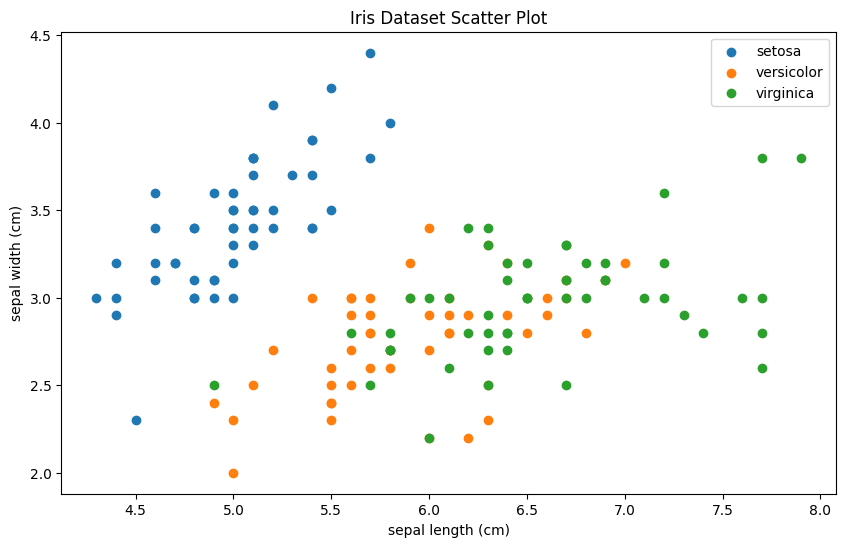

In [4]:
# Select features for the scatter plot (first two features)
# This is for the sake of visualization in 2D
features = X[:, :2]
feature_names = iris.feature_names[:2]

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(iris.target_names):
    # Extract the indices for each class
    idx = y == i
    plt.scatter(features[idx, 0], features[idx, 1], label=class_name)

# Label the plot
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset Scatter Plot')
plt.legend()
plt.show()


In [5]:
# Split the dataset into a training set and a test set
# By default, 75% of the data will be used for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Output the size of the training and test sets
(X_train.shape[0], X_test.shape[0])


(112, 38)

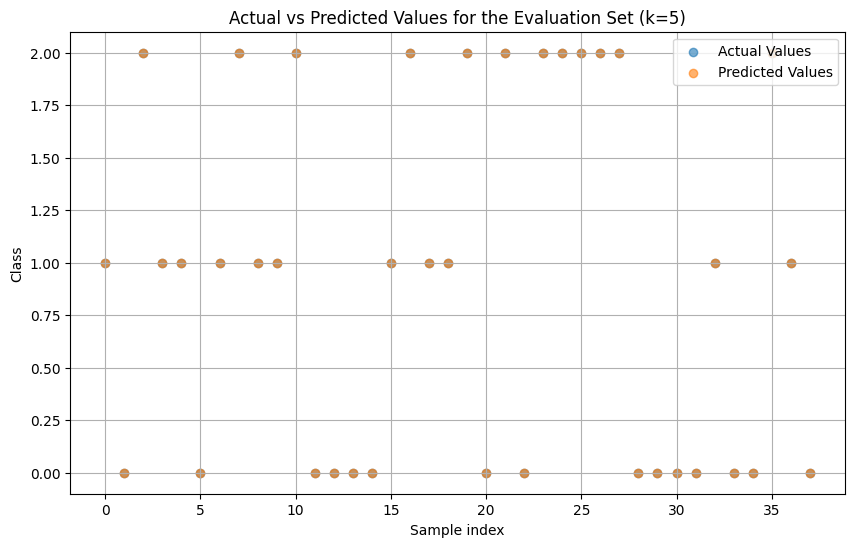

In [6]:
# To evaluate the model for k=5, we will calculate the accuracy on the training and evaluation data.
k = 5
knn = KNN(k)
knn.fit(X_train, y_train)

# Predict the classes of the training and test sets
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Calculate the accuracy on the training and test sets
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

# Generate and save a plot of the actual vs predicted values for the evaluation set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', alpha=0.6)
plt.scatter(range(len(y_pred_test)), y_pred_test, label='Predicted Values', alpha=0.6)
plt.title('Actual vs Predicted Values for the Evaluation Set (k=5)')
plt.xlabel('Sample index')
plt.ylabel('Class')
plt.legend()
plt.grid(True)

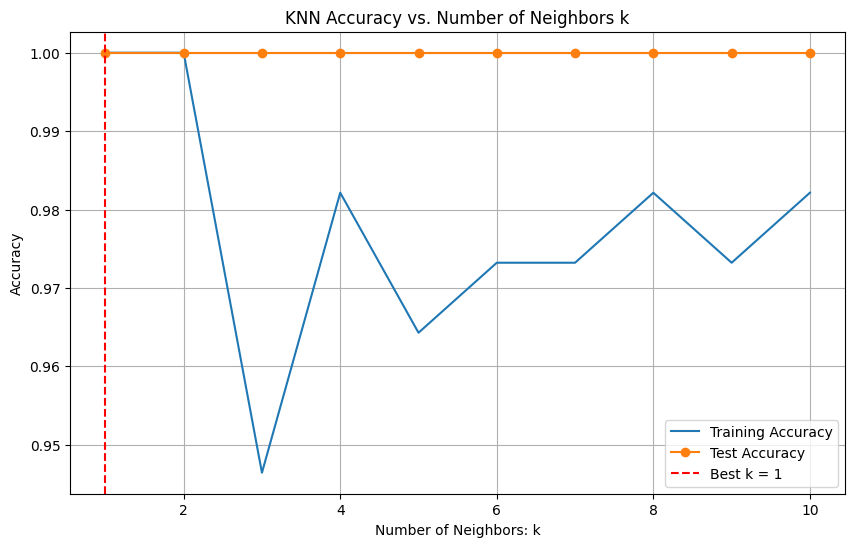

In [8]:
# We will re-train the KNN classifier for k values from 1 to 10 and collect the accuracy scores for each.
train_accuracies = []
test_accuracies = []
k_values = list(range(1, 11))

# Train and evaluate the model for each k
for k in k_values:
    knn = KNN(k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_accuracies.append(np.mean(y_pred_train == y_train))
    test_accuracies.append(np.mean(y_pred_test == y_test))

# Find the best k based on the highest test accuracy
best_k_index = np.argmax(test_accuracies)
best_k = k_values[best_k_index]
best_k_accuracy = test_accuracies[best_k_index]

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('KNN Accuracy vs. Number of Neighbors k')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)